In [1]:
from feature_selection_utils import *
from supervised_utils import *
from neural_net_utils import *

### Feature selection per il task di regressione

In [2]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la regressione (con MSE 0.43)
best_model = joblib.load("models/Random_Forest_Reg-v2.joblib")

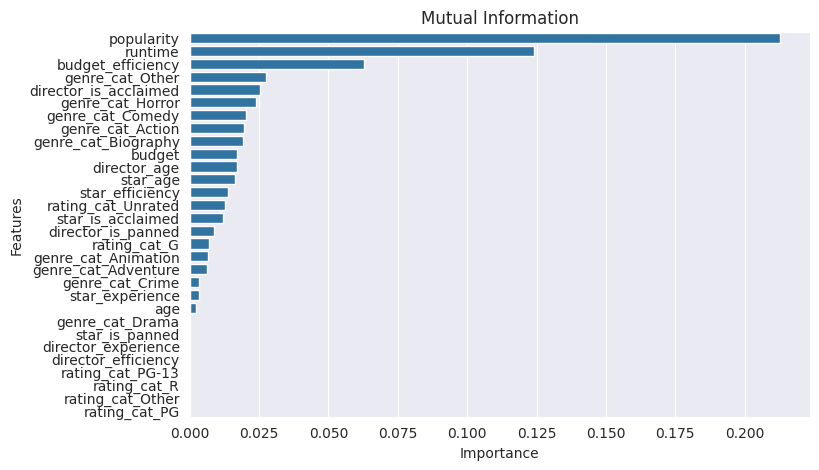

,feature,importance
2,popularity,0.212721
1,runtime,0.124202
4,budget_efficiency,0.062964
29,genre_cat_Other,0.027383
7,director_is_acclaimed,0.025543
28,genre_cat_Horror,0.023869
25,genre_cat_Comedy,0.020215
21,genre_cat_Action,0.019680
24,genre_cat_Biography,0.019154
3,budget,0.017058


In [3]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="regression").head(15)

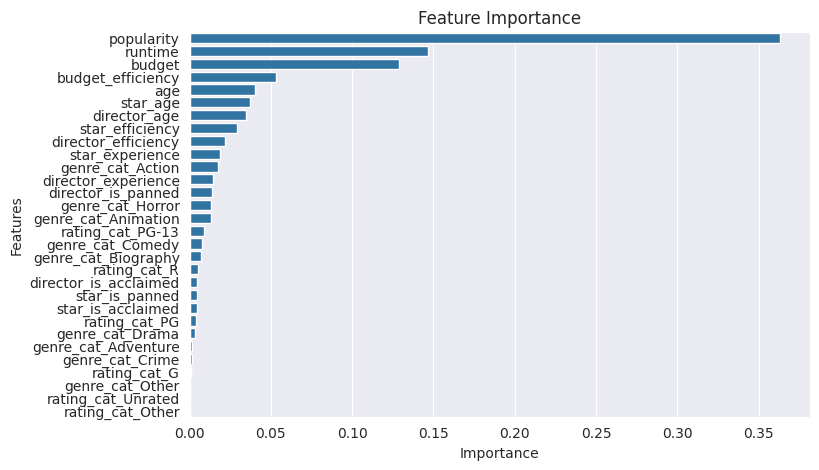

,feature,importance
2,popularity,0.363189
1,runtime,0.146476
3,budget,0.129070
4,budget_efficiency,0.053127
0,age,0.040301
10,star_age,0.036977
5,director_age,0.034802
14,star_efficiency,0.029354
9,director_efficiency,0.022105
11,star_experience,0.018840


In [4]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="regression").head(15)

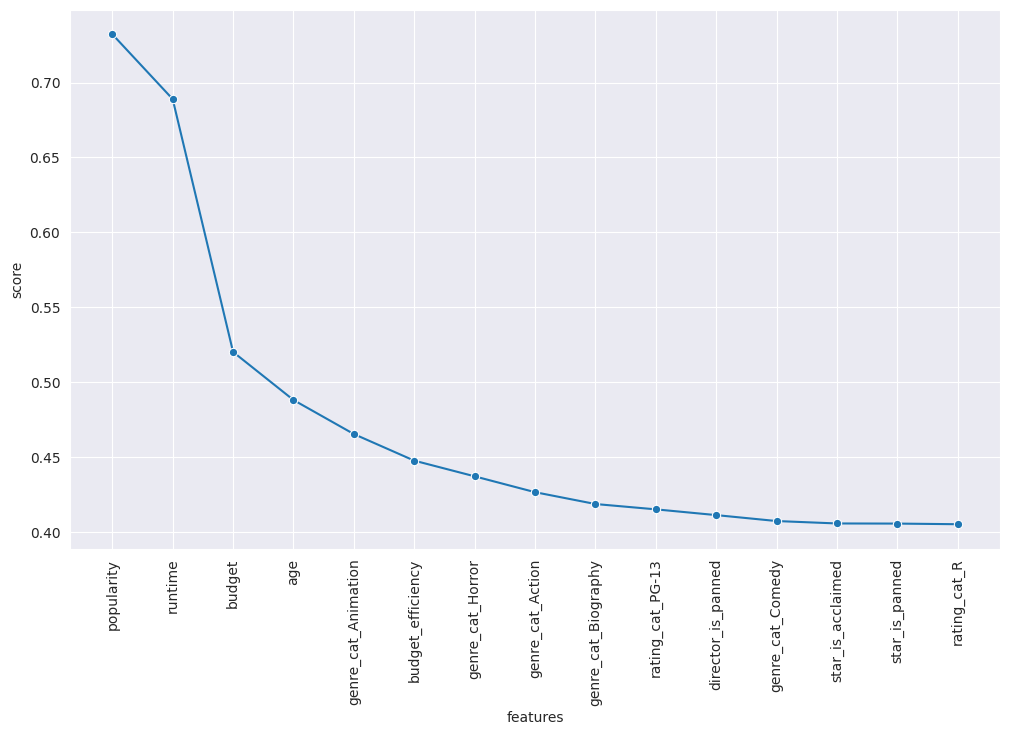

,features,score
0,popularity,0.732224
1,runtime,0.688937
2,budget,0.520304
3,age,0.488250
4,genre_cat_Animation,0.465544
5,budget_efficiency,0.447806
6,genre_cat_Horror,0.437343
7,genre_cat_Action,0.426768
8,genre_cat_Biography,0.418871
9,rating_cat_PG-13,0.415320


In [5]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="regression")

#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

> TRAINING...

Epoch #1
Train loss: 0.4485 | Val loss: 0.0809

Epoch #2
Train loss: 0.0451 | Val loss: 0.0300

Epoch #3
Train loss: 0.0297 | Val loss: 0.0277

Epoch #4
Train loss: 0.0290 | Val loss: 0.0276

Epoch #5
Train loss: 0.0289 | Val loss: 0.0276

Epoch #6
Train loss: 0.0289 | Val loss: 0.0276

Epoch #7
Train loss: 0.0289 | Val loss: 0.0276

Epoch #8
Train loss: 0.0289 | Val loss: 0.0276

Epoch #9
Train loss: 0.0289 | Val loss: 0.0276

Epoch #10
Train loss: 0.0289 | Val loss: 0.0276

Epoch #11
Train loss: 0.0289 | Val loss: 0.0276

Epoch #12
Train loss: 0.0289 | Val loss: 0.0276

Epoch #13
Train loss: 0.0288 | Val loss: 0.0276

Epoch #14
Train loss: 0.0289 | Val loss: 0.0276

Epoch #15
Train loss: 0.0289 | Val loss: 0.0276

Epoch #16
Train loss: 0.0289 | Val loss: 0.0276

Epoch #17
Train loss: 0.0289 | Val loss: 0.0276

Epoch #18
Train loss: 0.0289 | Val loss: 0.0276

Epoch #19
Train loss: 0.0289 | Val loss: 0.0276

Epoch #20
Train loss: 0.0289 | Val loss: 0.0276

Epoch #21
Trai

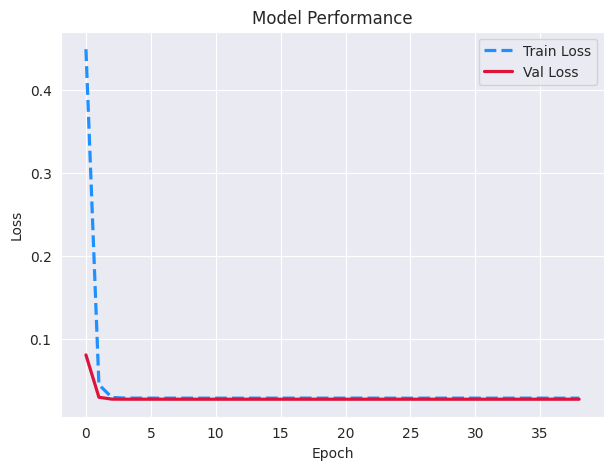

Early stopping at epoch #39.

> TESTING...

Loss: 0.0333



In [9]:
best_features = ["popularity",
                 "runtime",
                 "budget",
                 "age",
                 "budget_efficiency",
                 "director_age",
                 "star_age",
                 "genre_cat_Animation",
                 "genre_cat_Action",
                 "genre_cat_Horror",
                 "rating_cat_PG-13",
                 "director_experience",
                 "star_experience",
                 "director_is_panned",
                 "star_is_panned"]

# training della rete per il task di regressione
trainer = Trainer(df, cols, best_features, task="regression")
trainer.fit()

### Feature selection per il task di classificazione

In [5]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la classificazione (con accuracy 53%)
best_model = joblib.load("models/Random_Forest_Cls-v2(resampled).joblib")

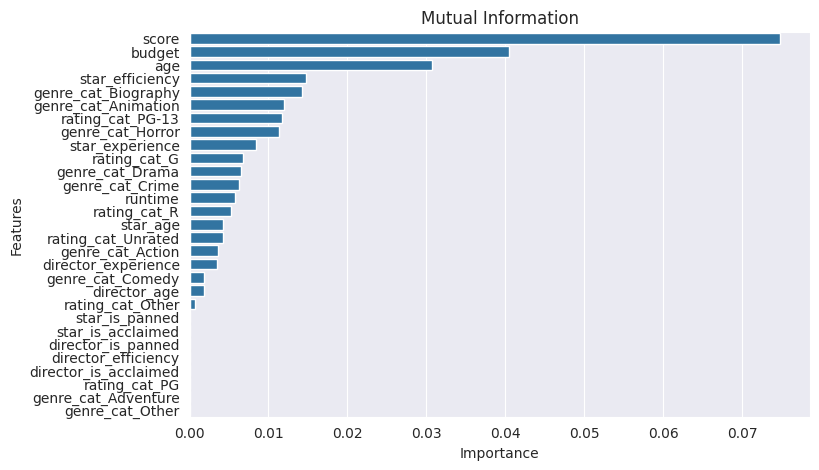

,feature,importance
2,score,0.074775
3,budget,0.040499
0,age,0.030699
13,star_efficiency,0.014774
23,genre_cat_Biography,0.014289
22,genre_cat_Animation,0.011926
17,rating_cat_PG-13,0.011718
27,genre_cat_Horror,0.011362
10,star_experience,0.008378
14,rating_cat_G,0.006743


In [6]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="classification").head(15)

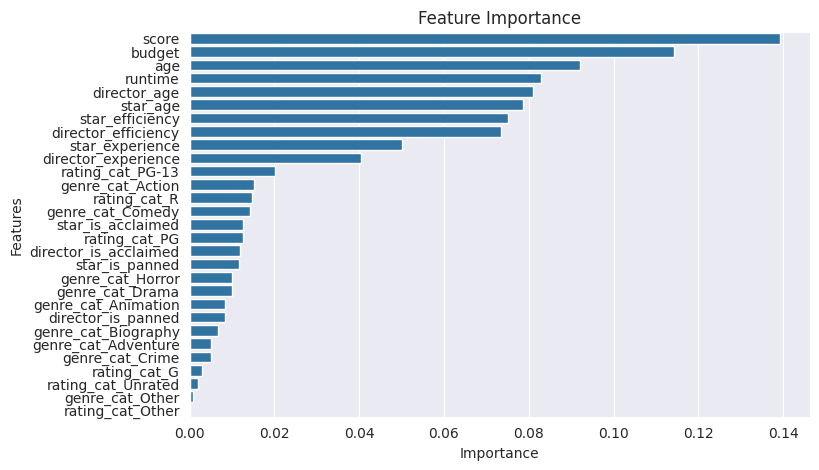

,feature,importance
2,score,0.139269
3,budget,0.114332
0,age,0.092055
1,runtime,0.082936
4,director_age,0.081110
9,star_age,0.078596
13,star_efficiency,0.075167
8,director_efficiency,0.073546
10,star_experience,0.050104
5,director_experience,0.040463


In [7]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="classification").head(15)

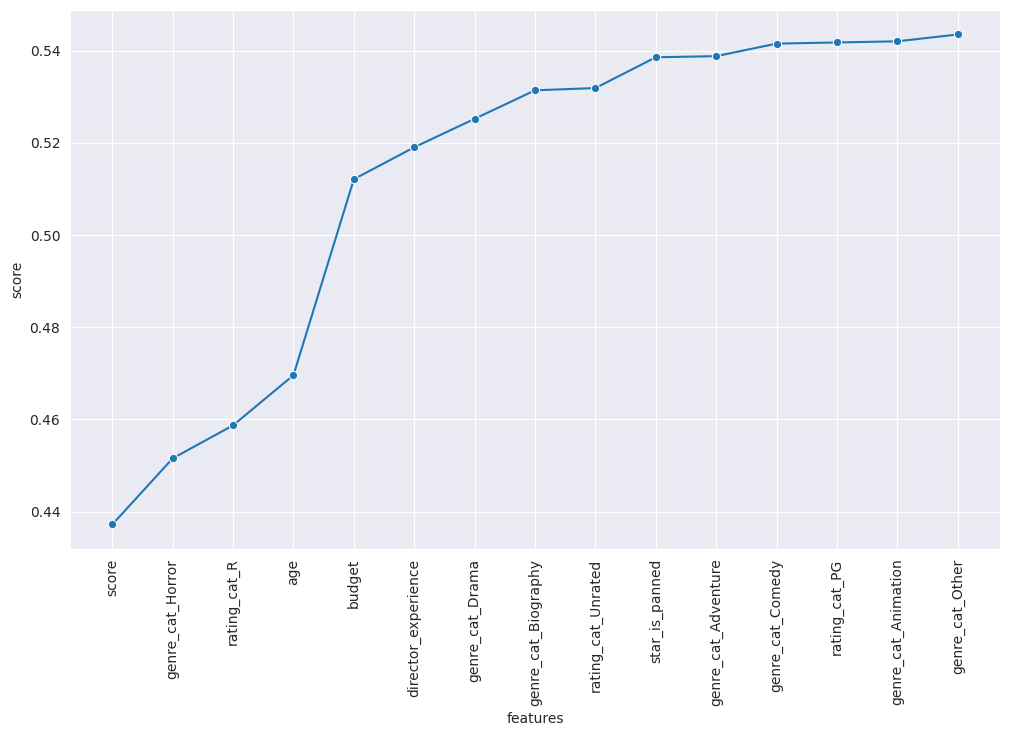

,features,score
0,score,0.437222
1,genre_cat_Horror,0.451558
2,rating_cat_R,0.458725
3,age,0.469600
4,budget,0.512112
5,director_experience,0.519033
6,genre_cat_Drama,0.525208
7,genre_cat_Biography,0.531388
8,rating_cat_Unrated,0.531885
9,star_is_panned,0.538555


In [10]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="classification")

#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

> TRAINING...

Epoch #1
Train accuracy: 36.63% | Val accuracy: 40.59%

Epoch #2
Train accuracy: 37.64% | Val accuracy: 40.90%

Epoch #3
Train accuracy: 39.76% | Val accuracy: 42.28%

Epoch #4
Train accuracy: 38.91% | Val accuracy: 42.75%

Epoch #5
Train accuracy: 40.03% | Val accuracy: 42.59%

Epoch #6
Train accuracy: 39.26% | Val accuracy: 42.13%

Epoch #7
Train accuracy: 39.68% | Val accuracy: 42.59%

Epoch #8
Train accuracy: 39.61% | Val accuracy: 42.28%

Epoch #9
Train accuracy: 38.95% | Val accuracy: 42.75%

Epoch #10
Train accuracy: 39.72% | Val accuracy: 43.06%

Epoch #11
Train accuracy: 39.88% | Val accuracy: 43.36%

Epoch #12
Train accuracy: 40.26% | Val accuracy: 43.06%

Epoch #13
Train accuracy: 40.57% | Val accuracy: 42.28%

Epoch #14
Train accuracy: 40.30% | Val accuracy: 43.36%

Epoch #15
Train accuracy: 39.91% | Val accuracy: 42.44%

Epoch #16
Train accuracy: 39.68% | Val accuracy: 44.44%

Epoch #17
Train accuracy: 40.22% | Val accuracy: 45.68%

Epoch #18
Train accuracy:

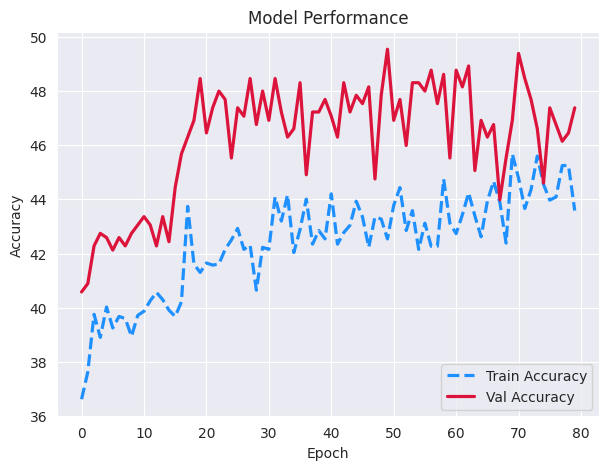

Early stopping at epoch #80.

> TESTING...

Accuracy: 47.78%


In [8]:
best_features = ["score",
                 "runtime",
                 "budget",
                 "age",
                 "director_age",
                 "star_age",
                 "director_efficiency",
                 "star_efficiency",
                 "director_experience",
                 "star_experience",
                 "genre_cat_Comedy",
                 "genre_cat_Drama",
                 "genre_cat_Horror",
                 "rating_cat_PG-13",
                 "rating_cat_R"]

# training della rete per il task di classificazione
trainer = Trainer(df, cols, best_features, task="classification", resample=False)
trainer.fit()